Введите имя файлаtest.txt


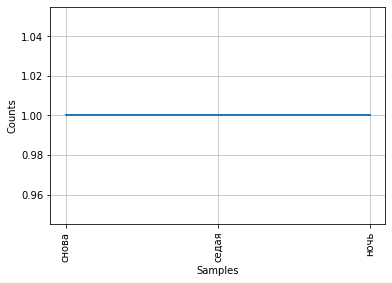

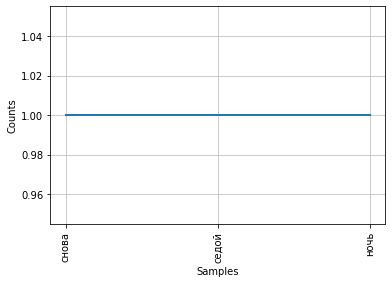

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
import re
import pymorphy2
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize

filename = input('Введите имя файла')
morph = pymorphy2.MorphAnalyzer()
stop_words = set(stopwords.words('russian'))

#Токенизация, и очистка слов. Получаю список словоформ и лемм.
words = word_tokenize(open(filename, encoding='utf8').read(), language = 'russian')
clear_words = re.findall(r'(?:\s|\b)([а-яА-Я]+)(?:\s|\b)', ' '.join(words))
words_forms = [word for word in clear_words if not word.lower() in stop_words]
lemmatized_words=[morph.parse(word)[0].normal_form for word in words_forms]

#Списки словоформ и лемм с их частотами
fdist_forms = FreqDist(words_forms)
fdist_lemma = FreqDist(lemmatized_words)

#Строю графики
fdist_forms.plot(30,cumulative = False)
fdist_lemma.plot(30, cumulative=False)

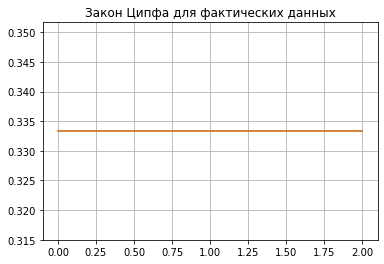

In [13]:
#Для проверки закона Ципфа вытаскиваю и сортирую относительные частоты
freq_forms = [v for k,v in fdist_forms.items()]
freq_lemma = [v for k,v in fdist_lemma.items()]

freq_forms = sorted(freq_forms,reverse = True)
freq_lemma = sorted(freq_lemma,reverse = True)

freq_forms = [freq_forms[i]/len(freq_forms) for i in range(len(freq_forms))]
freq_lemma = [freq_lemma[i]/len(freq_lemma) for i in range(len (freq_lemma))]

plt.grid()
plt.title('Закон Ципфа для фактических данных')
plt.plot(freq_forms)
plt.plot(freq_lemma)

In [14]:
#Топ 50 словоформ
fdist_forms.most_common(50)

[('снова', 1), ('седая', 1), ('ночь', 1)]

In [15]:
#Топ 50 лемм
fdist_lemma.most_common(50)

[('снова', 1), ('седой', 1), ('ночь', 1)]